In [1]:
%matplotlib notebook

import numpy as np
import os
import fabio
import matplotlib.pyplot as plt
from smi_analysis import SMI_beamline, stitch

In [2]:
path = 'C:\\Users\\GF237276\\Desktop\\Projets\\Safelymove\\2023_06_19\\data_xeuss\\'
for file in os.listdir(path):
    print(file)

2023_06_19_Safelymove_0_00000.edf
2023_06_19_Safelymove_0_00001.edf
2023_06_19_Safelymove_0_00002.edf
2023_06_19_Safelymove_0_00003.edf
2023_06_19_Safelymove_0_00004.edf
2023_06_19_Safelymove_0_00005.edf
2023_06_19_Safelymove_0_00006.edf
2023_06_19_Safelymove_0_vd_00001-00002.edf
2023_06_19_Safelymove_0_vd_00003-00004.edf
2023_06_19_Safelymove_0_vd_00005-00006.edf
2023_06_19_Safelymove_1_00000.edf
2023_06_19_Safelymove_1_00001.edf
2023_06_19_Safelymove_1_00002.edf
2023_06_19_Safelymove_1_00003.edf
2023_06_19_Safelymove_1_00004.edf
2023_06_19_Safelymove_1_00005.edf
2023_06_19_Safelymove_1_00006.edf
dummy.txt
macro.mac


<IPython.core.display.Javascript object>


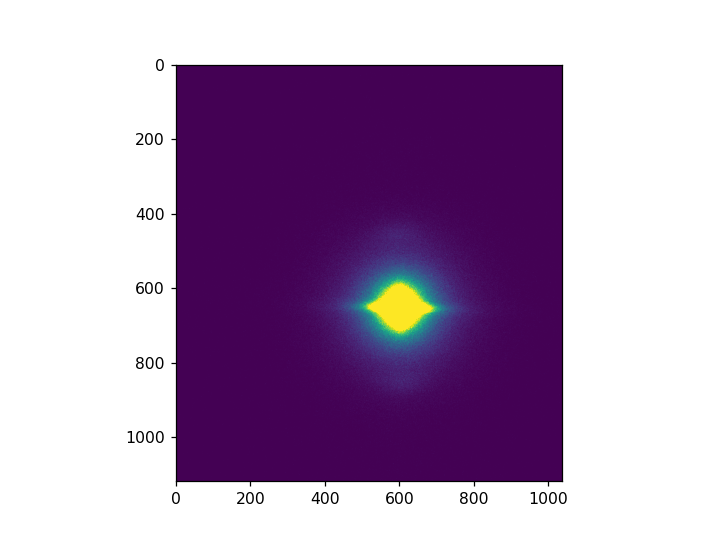

In [3]:
file = '2023_06_19_Safelymove_0_vd_00001-00002.edf'

img = fabio.open(os.path.join(path, file)).data

plt.figure()
plt.imshow(img, vmin=0, vmax=np.percentile(img, 99))
plt.show()

In [4]:
def read_header_xeuss(path, file):
    img = fabio.open(os.path.join(path, file))

    center = [float(img.header['Center_1']), float(img.header['Center_2'])]
    sdd = 1000 * float(img.header['SampleDistance'])
    wav = float(img.header['Wavelength'])

    alphai = float(img.header['phi'])  # To be checked
    alphai = np.deg2rad(0.4)

    # Definition detecteur
    gamma = float(img.header['Gamma'])
    delta = float(img.header['Delta'])
    rot1 = -gamma * (np.pi / 180)
    rot2 = -delta * (np.pi / 180)
    rot3 = -np.arccos(1 / (np.sqrt(np.tan(np.deg2rad(gamma)**2) * np.sin(np.deg2rad(delta)**2) + 1))) * (
                       np.pi / 180)
    
    return sdd, wav, alphai, center, rot1, rot2, rot3

sdd, wav, alphai, center, rot1, rot2, rot3 = read_header_xeuss(path, file)

In [5]:
sdd

1800.0

### Test on one file

<IPython.core.display.Javascript object>


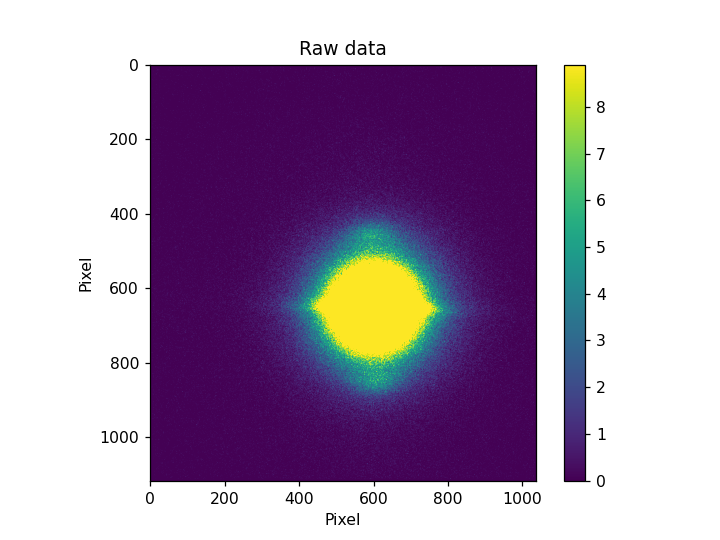

<IPython.core.display.Javascript object>


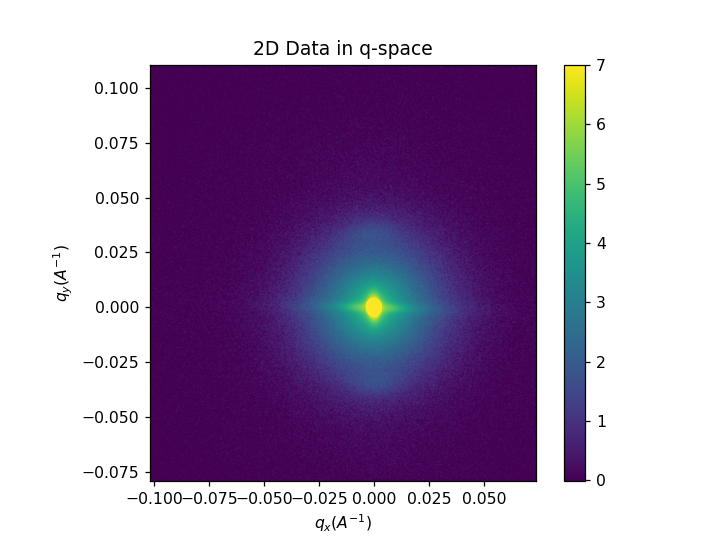

<IPython.core.display.Javascript object>


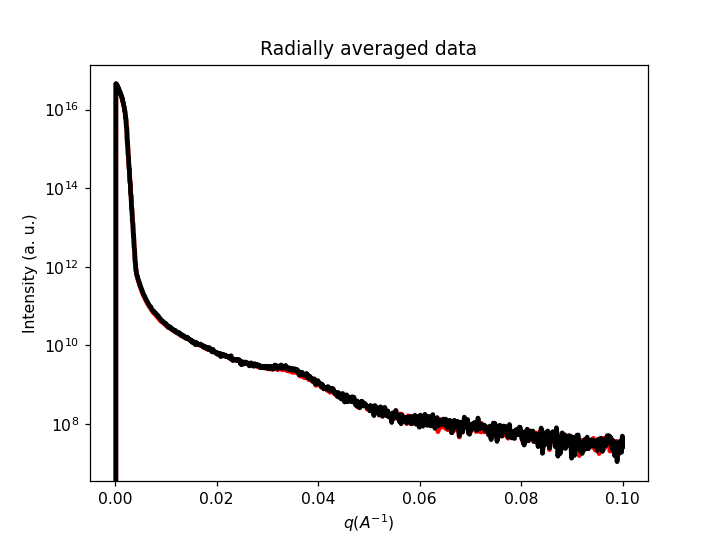

In [6]:
file = '2023_06_19_Safelymove_0_vd_00001-00002.edf'
geometry = 'Transmission'
bs_pos_waxs = [[0,0]]
detector_waxs = 'Eiger1M_xeuss'

SMI_waxs = SMI_beamline.SMI_geometry(geometry=geometry,
                                     sdd=sdd,
                                     wav=wav,
                                     alphai=alphai,
                                     center=center,
                                     bs_pos=bs_pos_waxs,
                                     detector=detector_waxs,
                                     det_angles=[[rot1, rot2, rot3]])

SMI_waxs.open_data(path, [file])
plt.figure()
plt.title('Raw data')
plt.imshow(SMI_waxs.imgs[0]*np.logical_not(SMI_waxs.masks[0]),
           vmin=0,
           vmax=np.percentile(SMI_waxs.imgs[0], 95))
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.colorbar()
plt.show()

SMI_waxs.stitching_data()

plt.figure()
plt.title('2D Data in q-space')
plt.imshow(np.log(1+SMI_waxs.img_st),
           extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]],
           vmax = 7
           )
# plt.imshow(SMI_waxs.img_st,
#            extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]],
#            vmin=0,
#            vmax=np.percentile(SMI_waxs.img_st, 98))
plt.xlabel('$q_{x} (A^{-1}$)')
plt.ylabel('$q_{y} (A^{-1}$)')
plt.colorbar()
plt.show()

SMI_waxs.caking(radial_range=[0, 2], azimuth_range=[-180, 180])

# SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-180, 180])
# q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

# SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-30, 30])
# q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad

SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-110, -70])
qs1, Is1 = SMI_waxs.q_rad, SMI_waxs.I_rad
SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-100, -80])
qs1b, Is1b = SMI_waxs.q_rad, SMI_waxs.I_rad


plt.figure()
plt.title('Radially averaged data')
# plt.plot(q0, I0, linewidth=3, color='k')
# plt.plot(q1, 2*I1, linewidth=3, color='g')
plt.plot(qs1, Is1, linewidth=3, color='r')
plt.plot(qs1b, Is1b, linewidth=3, color='k')

# plt.xscale('log')
plt.yscale('log')
plt.xlabel('$q (A^{-1}$)')
plt.ylabel('Intensity (a. u.)')
plt.show()


In [ ]:
file = '2023_06_19_Safelymove_0_vd_00001-00002.edf'
geometry = 'Transmission'
bs_pos_waxs = [[0,0]]
detector_waxs = 'Eiger1M_xeuss'

SMI_waxs = SMI_beamline.SMI_geometry(geometry=geometry,
                                     sdd=sdd,
                                     wav=wav,
                                     alphai=alphai,
                                     center=center,
                                     bs_pos=bs_pos_waxs,
                                     detector=detector_waxs,
                                     det_angles=[[rot1, rot2, rot3]])

SMI_waxs.open_data(path, [file])
SMI_waxs.stitching_data()
SMI_waxs.azimuthal_averaging(radial_range=None, azimuth_range=None)

SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-110, -70])
qs1, Is1 = SMI_waxs.q_rad, SMI_waxs.I_rad
SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-100, -80])
qs1b, Is1b = SMI_waxs.q_rad, SMI_waxs.I_rad


plt.figure()
plt.title('Radially averaged data')
# plt.plot(q0, I0, linewidth=3, color='k')
# plt.plot(q1, 2*I1, linewidth=3, color='g')
plt.plot(qs1, Is1, linewidth=3, color='r')
plt.plot(qs1b, Is1b, linewidth=3, color='k')

# plt.xscale('log')
plt.yscale('log')
plt.xlabel('$q (A^{-1}$)')
plt.ylabel('Intensity (a. u.)')
plt.show()


<IPython.core.display.Javascript object>


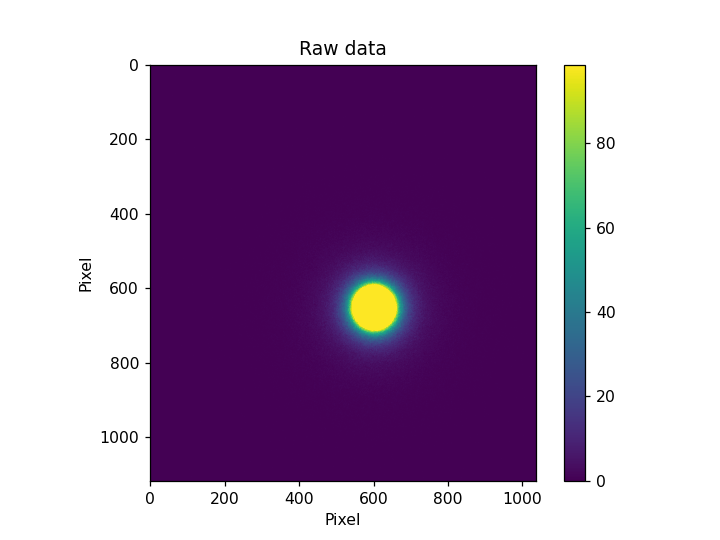

<IPython.core.display.Javascript object>


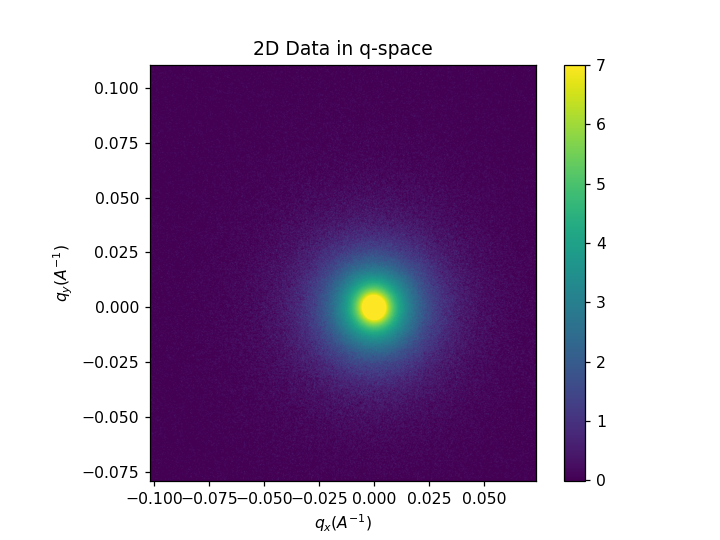

<IPython.core.display.Javascript object>


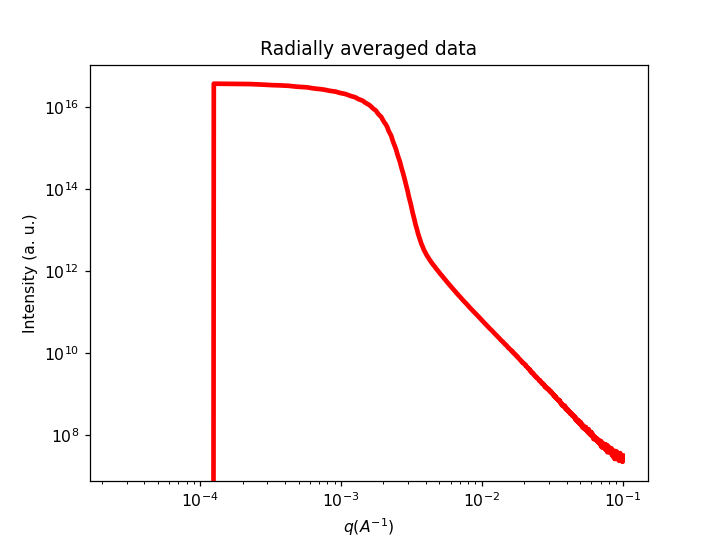

In [8]:
file = '2023_06_19_Safelymove_0_vd_00003-00004.edf'
geometry = 'Transmission'
bs_pos_waxs = [[0,0]]
detector_waxs = 'Eiger1M_xeuss'

SMI_waxs = SMI_beamline.SMI_geometry(geometry=geometry,
                                     sdd=sdd,
                                     wav=wav,
                                     alphai=alphai,
                                     center=center,
                                     bs_pos=bs_pos_waxs,
                                     detector=detector_waxs,
                                     det_angles=[[rot1, rot2, rot3]])

SMI_waxs.open_data(path, [file])
plt.figure()
plt.title('Raw data')
plt.imshow(SMI_waxs.imgs[0]*np.logical_not(SMI_waxs.masks[0]),
           vmin=0,
           vmax=np.percentile(SMI_waxs.imgs[0], 99))
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.colorbar()
plt.show()

SMI_waxs.stitching_data()

plt.figure()
plt.title('2D Data in q-space')
plt.imshow(np.log(1+SMI_waxs.img_st),
           extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]],
           vmax = 7
           )
# plt.imshow(SMI_waxs.img_st,
#            extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]],
#            vmin=0,
#            vmax=np.percentile(SMI_waxs.img_st, 98))
plt.xlabel('$q_{x} (A^{-1}$)')
plt.ylabel('$q_{y} (A^{-1}$)')
plt.colorbar()
plt.show()

SMI_waxs.caking(radial_range=[0, 2], azimuth_range=[-180, 180])

# SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-180, 180])
# q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

# SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-30, 30])
# q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad

SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-179, 179])
qs2, Is2 = SMI_waxs.q_rad, SMI_waxs.I_rad

plt.figure()
plt.title('Radially averaged data')
# plt.plot(q0, I0, linewidth=3, color='k')
# plt.plot(q1, 2*I1, linewidth=3, color='g')
plt.plot(qs2, Is2, linewidth=3, color='r')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$q (A^{-1}$)')
plt.ylabel('Intensity (a. u.)')
plt.show()


<IPython.core.display.Javascript object>


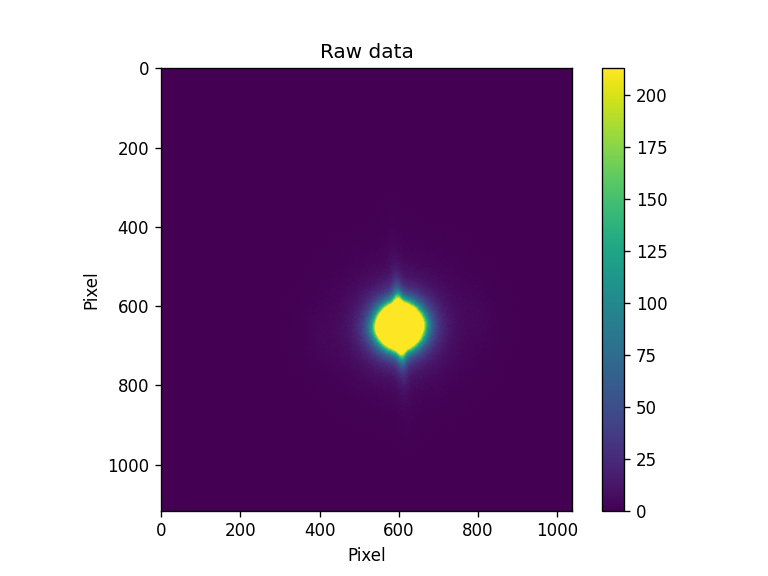

<IPython.core.display.Javascript object>


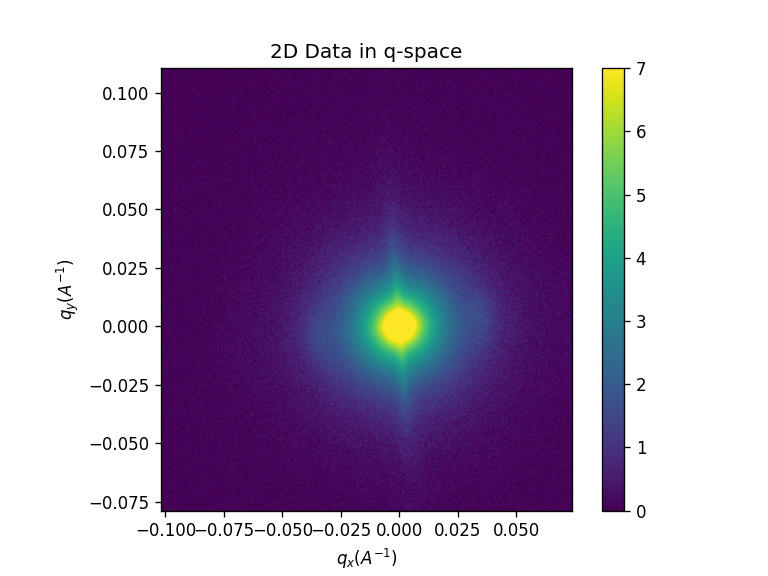

<IPython.core.display.Javascript object>


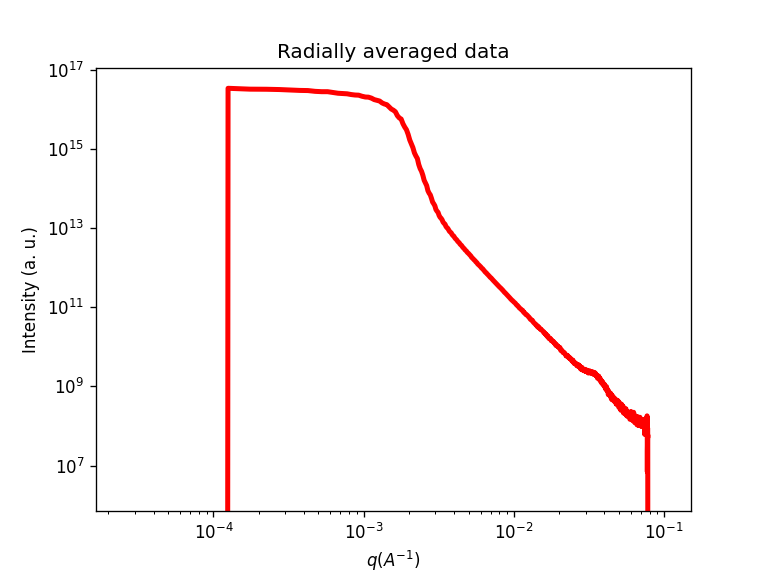

In [15]:
file = '2023_06_19_Safelymove_0_vd_00005-00006.edf'
geometry = 'Transmission'
bs_pos_waxs = [[0,0]]
detector_waxs = 'Eiger1M_xeuss'

SMI_waxs = SMI_beamline.SMI_geometry(geometry=geometry,
                                     sdd=sdd,
                                     wav=wav,
                                     alphai=alphai,
                                     center=center,
                                     bs_pos=bs_pos_waxs,
                                     detector=detector_waxs,
                                     det_angles=[[rot1, rot2, rot3]])

SMI_waxs.open_data(path, [file])
plt.figure()
plt.title('Raw data')
plt.imshow(SMI_waxs.imgs[0]*np.logical_not(SMI_waxs.masks[0]),
           vmin=0,
           vmax=np.percentile(SMI_waxs.imgs[0], 99))
plt.xlabel('Pixel')
plt.ylabel('Pixel')
plt.colorbar()
plt.show()

SMI_waxs.stitching_data()

plt.figure()
plt.title('2D Data in q-space')
plt.imshow(np.log(1+SMI_waxs.img_st),
           extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]],
           vmax = 7
           )
# plt.imshow(SMI_waxs.img_st,
#            extent=[SMI_waxs.qp[0], SMI_waxs.qp[-1], SMI_waxs.qz[0], SMI_waxs.qz[-1]],
#            vmin=0,
#            vmax=np.percentile(SMI_waxs.img_st, 98))
plt.xlabel('$q_{x} (A^{-1}$)')
plt.ylabel('$q_{y} (A^{-1}$)')
plt.colorbar()
plt.show()

SMI_waxs.caking(radial_range=[0, 2], azimuth_range=[-180, 180])

# SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-180, 180])
# q0, I0 = SMI_waxs.q_rad, SMI_waxs.I_rad

# SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-30, 30])
# q1, I1 = SMI_waxs.q_rad, SMI_waxs.I_rad

SMI_waxs.radial_averaging(radial_range=[0, 0.1], azimuth_range=[-20, 20])
qs3, Is3 = SMI_waxs.q_rad, SMI_waxs.I_rad

plt.figure()
plt.title('Radially averaged data')
# plt.plot(q0, I0, linewidth=3, color='k')
# plt.plot(q1, 2*I1, linewidth=3, color='g')
plt.plot(qs3, Is3, linewidth=3, color='r')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$q (A^{-1}$)')
plt.ylabel('Intensity (a. u.)')
plt.show()


<IPython.core.display.Javascript object>


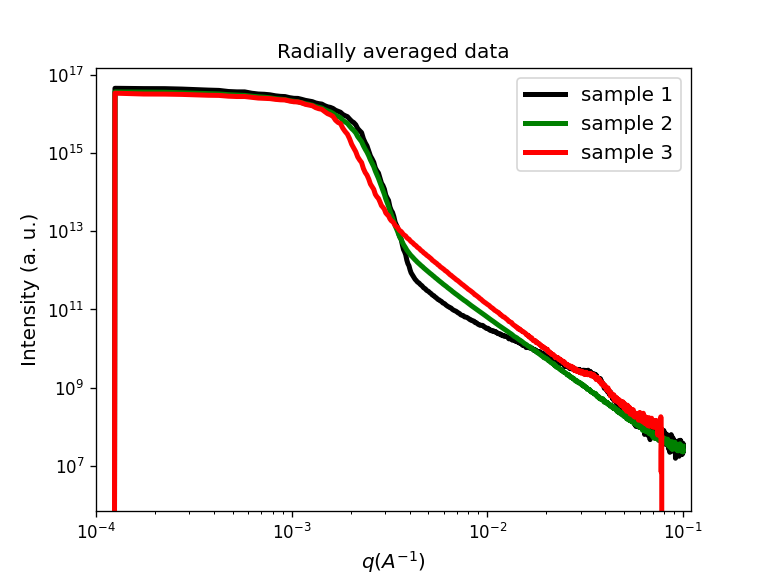

In [21]:
plt.figure()
plt.title('Radially averaged data', fontsize=12)
plt.plot(qs1, Is1, linewidth=3, color='k', label='sample 1')
plt.plot(qs2, Is2, linewidth=3, color='g', label='sample 2')
plt.plot(qs3, Is3, linewidth=3, color='r', label='sample 3')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$q (A^{-1}$)', fontsize=12)
plt.ylabel('Intensity (a. u.)', fontsize=12)
plt.legend(fontsize=12)
plt.xlim([1E-4, 0.11])
plt.show()
